In [74]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

**PARTIE 1** - Définition des fonctions

Fonction d'initialisation

In [75]:
def initialisation(X):
    W = np.random.random((X.shape[1],1))
    b = np.random.random(1)
    return W, b

Fonction de notre modèle, A est la fonction d'activation
Ici, on utilise une fonction logistique

In [58]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

Fonction coût

In [59]:
def log_loss(A,y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

Fonction des gradients

In [60]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW, db

Fonction de maj

In [61]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

Fonction de prédiction

In [62]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >=0.5

On code notre premier neurone

In [63]:
def artificial_neuron(X,y,learning_rate=0.1,n_iter=100):
    #initialiser les params W,B
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A,y))
        dW, db = gradients(A,X,y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X,W,b)
    print("Perfoemance de notre modele : ", accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return W, b


**PARTIE 2** - Iris

In [68]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))

Perfoemance de notre modele :  0.9


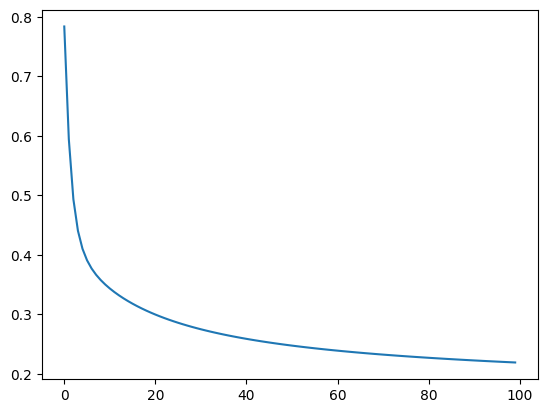

In [69]:
W, b = artificial_neuron(X, y)

On va tester avec de nouvelles plantes

In [70]:
new_plant = np.array([2,1])
predict(new_plant,W,b) #On s'attend a avoir True (c'est une plante toxique)

array([ True])

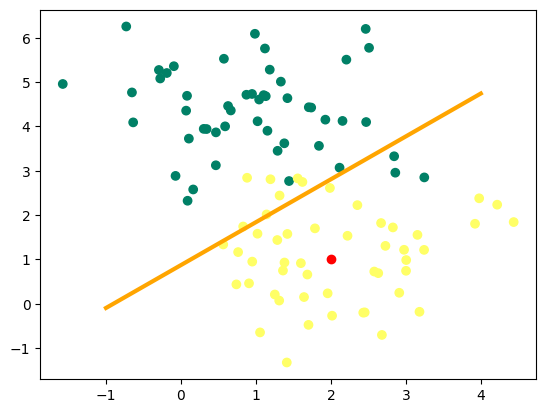

In [71]:
x0 = np.linspace(-1,4,100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:,1],c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1],c="r")
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

**PARTIE 3** - Cat or Dog

In [76]:
train_dataset = h5py.File('data_assets/trainset.hdf5', "r")
X_train = np.array(train_dataset["X_train"][:]) # your train set features
y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

test_dataset = h5py.File('data_assets/testset.hdf5', "r")
X_test = np.array(test_dataset["X_test"][:]) # your train set features
y_test = np.array(test_dataset["Y_test"][:]) # your train set labels